<center> <b>CREDIT RISK MODELING</b> </center>

Group: 

<br>
M20201191 Marcio jonavicius Rodrigues
<br>
M20201243 Raquel Frade
<br>
M20200389 Isabella Regina da Silva Rubio
<br>
M20200694 Arthur Campos
<br>
M20201148 Othon Luiz de Oliveira Leitão 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [211]:
%matplotlib inline
#Opção 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [212]:
df = pd.read_csv("Modelling sample.csv", encoding = 'latin_1') 

In [213]:
df.head(5)

,year,issue_d_time,final_d_time,emp_length_int,home_ownership,income_category,annual_inc,income_cat,loan_amount,term,purpose,interest_payments,loan_condition_cat,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2013,31,610,5.0000000000,MORTGAGE,Low,63000,1,3000,36months,vacation,High,0,15.6100000000,C,25.7700000000,3174112404,"3,000.0000000000",0,104.9000000000,leinster
1,2013,61,0,10.0000000000,OWN,Medium,117000,2,35000,60months,credit_card,High,0,17.7600000000,D,24.0600000000,22989,"11,510.2800000000",0,884.2100000000,munster
2,2011,792,426,6.0500000000,RENT,Low,15648,1,2400,36months,credit_card,Low,0,11.7100000000,B,21.7000000000,2856642657,"2,400.0000000000",0,79.3900000000,ulster
3,2013,31,0,10.0000000000,MORTGAGE,Medium,104000,2,35000,60months,credit_card,High,0,13.5300000000,B,20.7500000000,20141,"11,797.4700000000",0,805.8900000000,Northern-Irl
4,2010,1461,1095,5.0000000000,MORTGAGE,Low,95000,1,15000,36months,home_improvement,Low,0,11.1400000000,B,24.8700000000,17715,"14,999.9900000000",0,492.0600000000,leinster


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                15000 non-null  int64  
 1   issue_d_time        15000 non-null  int64  
 2   final_d_time        15000 non-null  int64  
 3   emp_length_int      15000 non-null  float64
 4   home_ownership      15000 non-null  object 
 5   income_category     15000 non-null  object 
 6   annual_inc          15000 non-null  int64  
 7   income_cat          15000 non-null  int64  
 8   loan_amount         15000 non-null  int64  
 9   term                15000 non-null  object 
 10  purpose             15000 non-null  object 
 11  interest_payments   15000 non-null  object 
 12  loan_condition_cat  15000 non-null  int64  
 13  interest_rate       15000 non-null  float64
 14  grade               15000 non-null  object 
 15  dti                 15000 non-null  float64
 16  tota

In [215]:
df.dtypes

year                    int64
issue_d_time            int64
final_d_time            int64
emp_length_int        float64
home_ownership         object
income_category        object
annual_inc              int64
income_cat              int64
loan_amount             int64
term                   object
purpose                object
interest_payments      object
loan_condition_cat      int64
interest_rate         float64
grade                  object
dti                   float64
total_pymnt             int64
total_rec_prncp       float64
recoveries              int64
installment           float64
region                 object
dtype: object

In [216]:
#Describe without scientic notation 
pd.options.display.float_format = '{:,.10f}'.format
# To reset pd.reset_option('^display.', silent=True)
df.describe()

,year,issue_d_time,final_d_time,emp_length_int,annual_inc,income_cat,loan_amount,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,"15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000","15,000.0000000000"
mean,"2,011.8968000000",526.2413333333,522.0623333333,5.7363300000,"71,041.9676000000",1.1685333333,"13,179.2616666667",0.1362666667,13.5783900000,15.7887013333,"1,773,248,622.0260000229","9,753.5569906667",146.6414666667,396.7521773333
std,1.4875137892,590.3499567457,584.5614716938,3.4989235195,"45,533.4101421707",0.4098874432,"7,947.8231499395",0.3430829481,4.3744393739,7.4769120182,"6,311,767,840.4709358215","6,894.8846102680","4,012.2209513676",235.8567820545
min,"2,007.0000000000",31.0000000000,0.0000000000,0.5000000000,"4,000.0000000000",1.0000000000,500.0000000000,0.0000000000,5.4200000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,15.6900000000
25%,"2,011.0000000000",61.0000000000,0.0000000000,2.0000000000,"44,272.0000000000",1.0000000000,"7,000.0000000000",0.0000000000,10.5700000000,10.1700000000,"7,171.7500000000","4,800.0000000000",0.0000000000,222.4850000000
50%,"2,013.0000000000",122.0000000000,334.0000000000,6.0000000000,"61,000.0000000000",1.0000000000,"12,000.0000000000",0.0000000000,13.3500000000,15.6000000000,"12,962.0000000000","8,000.0000000000",0.0000000000,347.1500000000
75%,"2,013.0000000000",976.0000000000,822.0000000000,10.0000000000,"85,000.0000000000",1.0000000000,"18,000.0000000000",0.0000000000,16.2000000000,21.1625000000,"31,746.5000000000","13,077.9625000000",0.0000000000,518.4325000000
max,"2,013.0000000000","2,406.0000000000","2,953.0000000000",10.0000000000,"1,200,000.0000000000",3.0000000000,"35,000.0000000000",1.0000000000,26.0600000000,34.9500000000,"81,700,000,000.0000000000","35,000.0200000000","376,486.0000000000","1,402.1700000000"


# 1) Exploratory analysis 

<p style="color:red"><b>Response variable</b> </p>


In [217]:
df['loan_condition_cat'].value_counts() 

0    12956
1     2044
Name: loan_condition_cat, dtype: int64

<p style="color:red"><b>Missing value </b> </p>

In [218]:
## Verificar se tem missing 
df.isnull().sum()

year                  0
issue_d_time          0
final_d_time          0
emp_length_int        0
home_ownership        0
income_category       0
annual_inc            0
income_cat            0
loan_amount           0
term                  0
purpose               0
interest_payments     0
loan_condition_cat    0
interest_rate         0
grade                 0
dti                   0
total_pymnt           0
total_rec_prncp       0
recoveries            0
installment           0
region                0
dtype: int64

In [219]:
# check if there is correlated variables

We select the numeric variable to analyse separately

In [220]:
df.head()

,year,issue_d_time,final_d_time,emp_length_int,home_ownership,income_category,annual_inc,income_cat,loan_amount,term,purpose,interest_payments,loan_condition_cat,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2013,31,610,5.0000000000,MORTGAGE,Low,63000,1,3000,36months,vacation,High,0,15.6100000000,C,25.7700000000,3174112404,"3,000.0000000000",0,104.9000000000,leinster
1,2013,61,0,10.0000000000,OWN,Medium,117000,2,35000,60months,credit_card,High,0,17.7600000000,D,24.0600000000,22989,"11,510.2800000000",0,884.2100000000,munster
2,2011,792,426,6.0500000000,RENT,Low,15648,1,2400,36months,credit_card,Low,0,11.7100000000,B,21.7000000000,2856642657,"2,400.0000000000",0,79.3900000000,ulster
3,2013,31,0,10.0000000000,MORTGAGE,Medium,104000,2,35000,60months,credit_card,High,0,13.5300000000,B,20.7500000000,20141,"11,797.4700000000",0,805.8900000000,Northern-Irl
4,2010,1461,1095,5.0000000000,MORTGAGE,Low,95000,1,15000,36months,home_improvement,Low,0,11.1400000000,B,24.8700000000,17715,"14,999.9900000000",0,492.0600000000,leinster


In [265]:
# sample 

#df=df.sample(n=15000, random_state=7)

In [266]:
#df.to_csv ('modelling.csv', index = False, header=True)

In [267]:
df_num = df.loc[:,["year", 'issue_d_time','final_d_time', 'emp_length_int', 'annual_inc', 'loan_amount', 'interest_rate',
                   'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries','installment', 'loan_condition_cat']]

Analyse of the correlation between the numerical independent variable 

In [268]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,issue_d_time,final_d_time,emp_length_int,annual_inc,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,loan_condition_cat
year,1.000000,-0.991831,-0.827794,0.195795,0.051160,0.230826,0.237123,0.247875,0.044161,0.054831,-0.026696,0.250814,-0.042597
issue_d_time,-0.991831,1.000000,0.831669,-0.194418,-0.052859,-0.234501,-0.236478,-0.249617,-0.043467,-0.052766,0.022972,-0.254327,0.041788
final_d_time,-0.827794,0.831669,1.000000,-0.180305,-0.040848,-0.226509,-0.186534,-0.220918,-0.059236,-0.074503,0.030933,-0.212937,0.181689
emp_length_int,0.195795,-0.194418,-0.180305,1.000000,0.118729,0.157704,0.050385,0.072064,0.000405,0.093425,0.005393,0.140640,-0.016979
annual_inc,0.051160,-0.052859,-0.040848,0.118729,1.000000,0.395839,0.019910,-0.157552,0.012796,0.359751,-0.002486,0.399242,-0.062572
loan_amount,0.230826,-0.234501,-0.226509,0.157704,0.395839,1.000000,0.219527,0.105806,0.000600,0.734140,0.006737,0.947047,0.011917
interest_rate,0.237123,-0.236478,-0.186534,0.050385,0.019910,0.219527,1.000000,0.175288,0.006299,-0.012026,0.017910,0.206925,0.160827
dti,0.247875,-0.249617,-0.220918,0.072064,-0.157552,0.105806,0.175288,1.000000,-0.012454,0.000575,0.012724,0.105942,0.041602
total_pymnt,0.044161,-0.043467,-0.059236,0.000405,0.012796,0.000600,0.006299,-0.012454,1.000000,0.135845,-0.002889,-0.001347,-0.111353
total_rec_prncp,0.054831,-0.052766,-0.074503,0.093425,0.359751,0.734140,-0.012026,0.000575,0.135845,1.000000,-0.033579,0.756606,-0.330861


In [269]:
# as issue_d_time and final_d_time are correlated with year, we excluded the this variable year 
# the variable installment and loan_amount are also correlated and we deleted the variable installment

In [270]:
df_num.drop(['year'], axis='columns', inplace=True)
df_num.drop(['installment'], axis='columns', inplace=True)

<p style="color:red"><b> Outliers Treatement </b> </p>

In [271]:
len(df_num.columns)

11

issue_d_time             AxesSubplot(0.125,0.749828;0.227941x0.130172)
final_d_time          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
emp_length_int        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
annual_inc               AxesSubplot(0.125,0.593621;0.227941x0.130172)
loan_amount           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
interest_rate         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
dti                      AxesSubplot(0.125,0.437414;0.227941x0.130172)
total_pymnt           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
total_rec_prncp       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
recoveries               AxesSubplot(0.125,0.281207;0.227941x0.130172)
loan_condition_cat    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

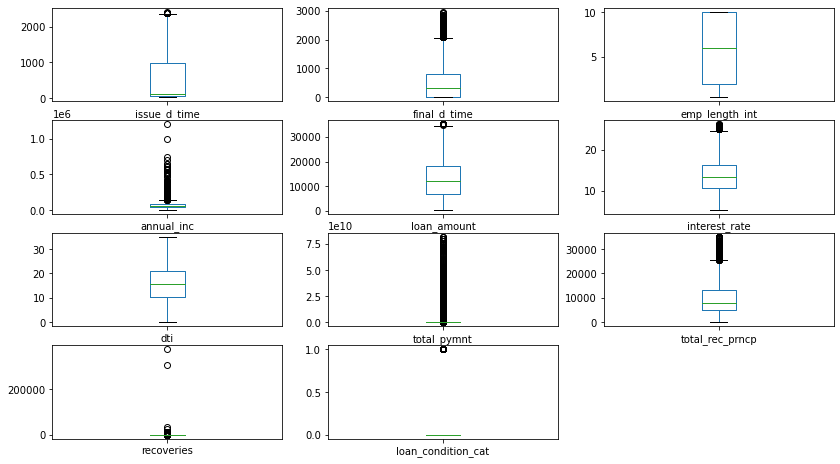

In [272]:
# 12 varibles -> 4x3
df_num.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

In [273]:
# Delete manualy some outlier

In [274]:
from scipy import stats

In [275]:
# issue_d_time
df_num2=df_num[(df_num['issue_d_time'] < df_num['issue_d_time'].quantile(0.99)) ]

In [276]:
# final_d_time
df_num2=df_num2[(df_num2['final_d_time'] < df_num['final_d_time'].quantile(0.99)) ]

In [277]:
# annual_inc
df_num2=df_num2[(df_num2['annual_inc'] < df_num['annual_inc'].quantile(0.99)) ]

In [278]:
# interest_rate
df_num2=df_num2[(df_num2['interest_rate'] < df_num['interest_rate'].quantile(0.99)) ]

In [279]:
# total_pymnt
df_num2.drop(['total_pymnt'], axis='columns', inplace=True)

issue_d_time             AxesSubplot(0.125,0.749828;0.227941x0.130172)
final_d_time          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
emp_length_int        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
annual_inc               AxesSubplot(0.125,0.593621;0.227941x0.130172)
loan_amount           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
interest_rate         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
dti                      AxesSubplot(0.125,0.437414;0.227941x0.130172)
total_rec_prncp       AxesSubplot(0.398529,0.437414;0.227941x0.130172)
recoveries            AxesSubplot(0.672059,0.437414;0.227941x0.130172)
loan_condition_cat       AxesSubplot(0.125,0.281207;0.227941x0.130172)
dtype: object

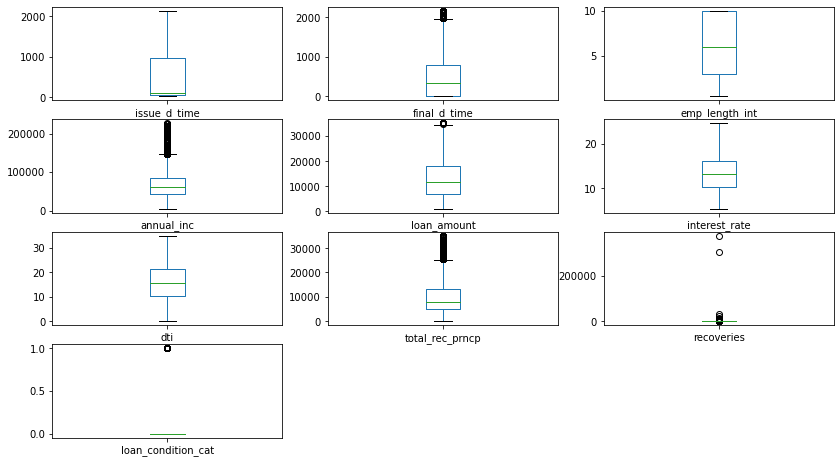

In [280]:
# 12 varibles -> 4x3
df_num2.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

In [281]:
# recoveries

In [282]:
df_num['recoveries'].describe()

count    15,000.0000000000
mean        146.6414666667
std       4,012.2209513678
min           0.0000000000
25%           0.0000000000
50%           0.0000000000
75%           0.0000000000
max     376,486.0000000000
Name: recoveries, dtype: float64

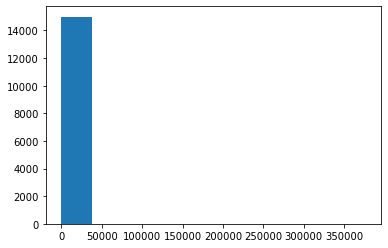

In [283]:
plt.hist(df_num['recoveries'])
plt.show()

In [284]:
x =df_num['recoveries'].values
y =df_num['loan_condition_cat'].values

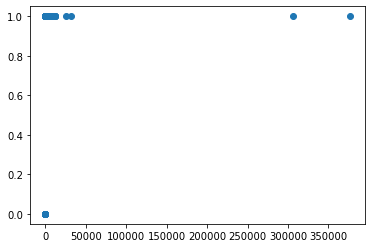

In [285]:
plt.scatter(x, y)
plt.show()

In [286]:
#  Drop the variavle recoveries in the data set df_num2 to create the recoveries_2 as categoric
df_num2.drop(['recoveries'], axis='columns', inplace=True)

In [346]:

# Create 2 categoris to recoveries
conditions = [
    (df['recoveries']== 0)]
choices = [0]

df['recoveries_2'] = np.select(conditions, choices, default=1)


# Categorical variable analysis

In [347]:
df_cat = df.loc[:,['home_ownership','income_category', 'income_cat', 'term', 'purpose', 'interest_payments', 'grade', 'region',
                    'recoveries_2']]

In [348]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

# 1 var - home_ownership

In [349]:
iv, data = calc_iv(df, 'home_ownership', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.01659431446211284


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,home_ownership,MORTGAGE,7456,6538,918,0.4970666667,0.1231223176,0.5046310590,0.4491193738,0.1165388677,0.0064692689
1,home_ownership,OTHER,26,17,9,0.0017333333,0.3461538462,0.0013121334,0.0044031311,-1.2106615622,0.0037421522
2,home_ownership,OWN,1280,1106,174,0.0853333333,0.1359375000,0.0853658537,0.0851272016,0.0027995539,0.0000006681
3,home_ownership,RENT,6238,5295,943,0.4158666667,0.1511702469,0.4086909540,0.4613502935,-0.1211983536,0.0063822253


# 2 var income_category

In [350]:
iv, data = calc_iv(df, 'income_category', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.026939845896257704


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,income_category,High,209,191,18,0.0139333333,0.0861244019,0.0147422044,0.0088062622,0.5152513412,0.0030585022
1,income_category,Low,12681,10855,1826,0.8454000000,0.1439949531,0.8378357518,0.8933463796,-0.0641523078,0.0035611349
2,income_category,Medium,2110,1910,200,0.1406666667,0.0947867299,0.1474220438,0.0978473581,0.4098908255,0.0203202089


# 3 var income_cat 

In [351]:
iv, data = calc_iv(df, 'income_cat', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.0269398458962577


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,income_cat,1,12681,10855,1826,0.8454000000,0.1439949531,0.8378357518,0.8933463796,-0.0641523078,0.0035611349
1,income_cat,2,2110,1910,200,0.1406666667,0.0947867299,0.1474220438,0.0978473581,0.4098908255,0.0203202089
2,income_cat,3,209,191,18,0.0139333333,0.0861244019,0.0147422044,0.0088062622,0.5152513412,0.0030585022


# 4 var purpose 

In [352]:
iv, data = calc_iv(df, 'purpose', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.05959055082219298


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,purpose,car,274,235,39,0.0182666667,0.1423357664,0.0181383143,0.0190802348,-0.0506264610,0.0000476861
1,purpose,credit_card,3037,2703,334,0.2024666667,0.1099769509,0.2086292065,0.1634050881,0.2443262243,0.0110494381
2,purpose,debt_consolidation,8134,7046,1088,0.5422666667,0.1337595279,0.5438406916,0.5322896282,0.0214686025,0.0002479852
3,purpose,educational,53,36,17,0.0035333333,0.3207547170,0.0027786354,0.0083170254,-1.0963447346,0.0060719848
4,purpose,home_improvement,940,817,123,0.0626666667,0.1308510638,0.0630595863,0.0601761252,0.0468044105,0.0001349587
5,purpose,house,93,78,15,0.0062000000,0.1612903226,0.0060203767,0.0073385519,-0.1979917034,0.0002609878
6,purpose,major_purchase,447,389,58,0.0298000000,0.1297539150,0.0300246990,0.0283757339,0.0564860041,0.0000931435
7,purpose,medical,177,149,28,0.0118000000,0.1581920904,0.0115004631,0.0136986301,-0.1749085332,0.0003844782
8,purpose,moving,139,116,23,0.0092666667,0.1654676259,0.0089533807,0.0112524462,-0.2285543538,0.0005254614
9,purpose,other,1039,860,179,0.0692666667,0.1722810395,0.0663785119,0.0875733855,-0.2771037456,0.0058731789


# 5 var term

In [353]:
iv, data = calc_iv(df, 'term', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.06588235869110066


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,term,36months,10984,9696,1288,0.7322666667,0.1172614712,0.7483791294,0.6301369863,0.1719724727,0.0203343937
1,term,60months,4016,3260,756,0.2677333333,0.1882470120,0.2516208706,0.3698630137,-0.3852092308,0.0455479650


# 6 var interest_payments 

In [354]:
iv, data = calc_iv(df, 'interest_payments', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.1539782839957427


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,interest_payments,High,7511,6147,1364,0.5007333333,0.1816003195,0.4744519914,0.6673189824,-0.3411077305,0.0657884216
1,interest_payments,Low,7489,6809,680,0.4992666667,0.0907998398,0.5255480086,0.3326810176,0.4572574183,0.0881898624


# 7 var grade 

In [355]:
iv, data = calc_iv(df, 'grade', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.2672878115564812


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,grade,A,2627,2482,145,0.1751333333,0.0551960411,0.1915714727,0.0709393346,0.9934358944,0.1198402959
1,grade,B,4677,4191,486,0.3118000000,0.1039127646,0.3234794690,0.2377690802,0.3078356951,0.0263847171
2,grade,C,3765,3215,550,0.2510000000,0.1460823373,0.2481475764,0.2690802348,-0.0809859705,0.0016952517
3,grade,D,2224,1787,437,0.1482666667,0.1964928058,0.1379283730,0.2137964775,-0.4382900089,0.0332522322
4,grade,E,1090,844,246,0.0726666667,0.2256880734,0.0651435628,0.1203522505,-0.6138293703,0.0338887140
5,grade,F,480,338,142,0.0320000000,0.2958333333,0.0260882989,0.0694716243,-0.9794314911,0.0424909951
6,grade,G,137,99,38,0.0091333333,0.2773722628,0.0076412473,0.0185909980,-0.8891166386,0.0097356056


# 5 var region 

In [356]:
iv, data = calc_iv(df, 'region', 'loan_condition_cat')
print('IV:', iv)
data

IV: 0.0016510992791149922


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,region,Northern-Irl,3679,3192,487,0.2452666667,0.1323729274,0.2463723371,0.2382583170,0.0334885065,0.0002717264
1,region,cannught,2345,2033,312,0.1563333333,0.1330490405,0.1569157147,0.1526418787,0.0276142969,0.0001180190
2,region,leinster,3508,3000,508,0.2338666667,0.1448118586,0.2315529484,0.2485322896,-0.0707642089,0.0012015296
3,region,munster,1672,1446,226,0.1114666667,0.1351674641,0.1116085211,0.1105675147,0.0093710745,0.0000097553
4,region,ulster,3796,3285,511,0.2530666667,0.1346153846,0.2535504785,0.2500000000,0.0141020117,0.0000500689


## Create the dummies variables 

In [357]:
df_cat.head()

,home_ownership,income_category,income_cat,term,purpose,interest_payments,grade,region,recoveries_2
404,RENT,Low,1,60months,debt_consolidation,High,F,munster,0
5221,RENT,Low,1,36months,debt_consolidation,Low,B,leinster,0
3357,MORTGAGE,Low,1,36months,other,Low,A,ulster,0
7336,MORTGAGE,Medium,2,36months,credit_card,High,C,ulster,0
8313,OWN,Low,1,36months,other,Low,B,Northern-Irl,0


In [358]:
df_cat_2=pd.get_dummies(df_cat)  

In [359]:
# merge the variables numeric with categoric 
df_2=pd.merge(df_num2, df_cat_2, left_index=True, right_index=True)

In [360]:
len(df_2.columns)

48

In [361]:
len(df_cat_2.columns)

39

In [369]:
df_2.head()

,issue_d_time,final_d_time,emp_length_int,annual_inc,loan_amount,interest_rate,dti,total_rec_prncp,loan_condition_cat,income_cat,recoveries_2,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_category_High,income_category_Low,income_category_Medium,term_36months,term_60months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
5221,945,1553,2.0000000000,35000,10500,9.9900000000,18.6200000000,758.3400000000,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3357,762,640,9.0000000000,30000,5000,6.0300000000,16.4800000000,"5,000.0000000000",0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
7336,61,214,10.0000000000,120000,32000,15.1000000000,5.0800000000,"32,000.0000000000",0,2,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
8313,915,730,3.0000000000,65004,4000,10.9900000000,13.2900000000,"4,000.0000000000",0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
7716,122,334,8.0000000000,165000,24000,8.9000000000,23.5500000000,"24,000.0000000000",0,2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


# 2) Feature engineering 

In [370]:
outcome=df_2['loan_condition_cat']

In [371]:
features=df_2.drop('loan_condition_cat', axis=1)

In [372]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 5221 to 12463
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   issue_d_time                14431 non-null  int64  
 1   final_d_time                14431 non-null  int64  
 2   emp_length_int              14431 non-null  float64
 3   annual_inc                  14431 non-null  int64  
 4   loan_amount                 14431 non-null  int64  
 5   interest_rate               14431 non-null  float64
 6   dti                         14431 non-null  float64
 7   total_rec_prncp             14431 non-null  float64
 8   loan_condition_cat          14431 non-null  int64  
 9   income_cat                  14431 non-null  int64  
 10  recoveries_2                14431 non-null  int32  
 11  home_ownership_MORTGAGE     14431 non-null  uint8  
 12  home_ownership_OTHER        14431 non-null  uint8  
 13  home_ownership_OWN          

# Decision tree 

In [373]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [374]:
def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances

In [375]:
variables, importances = etc_importances(features, outcome)

In [377]:
outcome.describe()

count   14,431.0000000000
mean         0.1308294643
std          0.3372254378
min          0.0000000000
25%          0.0000000000
50%          0.0000000000
75%          0.0000000000
max          1.0000000000
Name: loan_condition_cat, dtype: float64

In [378]:
def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum()
    this_variable = pd.Series([variables[i], sum_importance])
    sum_importances = sum_importances.append(this_variable, ignore_index = True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances

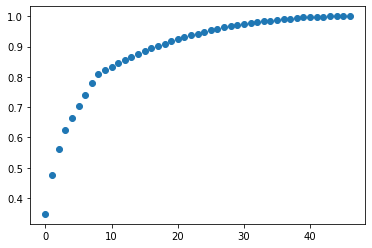

In [379]:
sum_importances = sum_and_plot_importances(variables, importances)

In [380]:
sum_importances

,0,1
0,recoveries_2,0.3476816140
1,total_rec_prncp,0.4771333503
2,final_d_time,0.5634422267
3,loan_amount,0.6255251595
4,dti,0.6645021066
5,issue_d_time,0.7027520153
6,interest_rate,0.7408382424
7,annual_inc,0.7780671825
8,emp_length_int,0.8110049650
9,purpose_debt_consolidation,0.8225179227


In [381]:
def keep_vars(features, sum_importances, threshold):
  keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
  features = features.loc[:, keep_vars]
  
  return features

In [382]:
features_c = keep_vars(features, sum_importances, threshold = 0.80)

In [383]:
features_c.shape

(14431, 8)

In [384]:
features_c.head(5)

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc
5221,0,758.3400000000,1553,10500,18.6200000000,945,9.9900000000,35000
3357,0,"5,000.0000000000",640,5000,16.4800000000,762,6.0300000000,30000
7336,0,"32,000.0000000000",214,32000,5.0800000000,61,15.1000000000,120000
8313,0,"4,000.0000000000",730,4000,13.2900000000,915,10.9900000000,65004
7716,0,"24,000.0000000000",334,24000,23.5500000000,122,8.9000000000,165000


# 3) Modeling 
Spliting the data set between train, validation and test

In [385]:
# Create the train base with 70% of the data
X_train, X_aux, y_train, y_aux = train_test_split(features_c, outcome, test_size=0.3, random_state=6)

In [386]:
# Create the validation and test with 15% of the data orginal dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_aux, y_aux, test_size=0.5, random_state=6)

In [387]:
print("train:", X_train.shape)
print("validation:", X_valid.shape)
print("test:", X_test.shape)

train: (10101, 8)
validation: (2165, 8)
test: (2165, 8)


# Logistic regression 

In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 
from sklearn import metrics

Confusion Matrix:


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


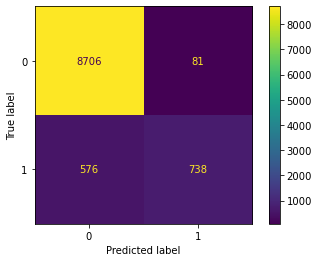

In [389]:
# fitting the model
lrc = LogisticRegression()
lrc.fit(X_train, y_train) 
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_train, y_train) 

In [390]:
# Predicted values
pred=lrc.predict(X_train)
# AUC
print("AUC:", roc_auc_score(y_train,pred)) 

AUC: 0.7762128362104043


### Validation

Confusion Matrix:


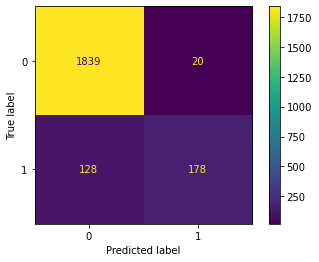

In [391]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_valid, y_valid) 

In [392]:
# Predicted values
pred=lrc.predict(X_valid)
# AUC
print("AUC:", roc_auc_score(y_valid,pred)) 

AUC: 0.7854704370541475


### Test

Confusion Matrix:


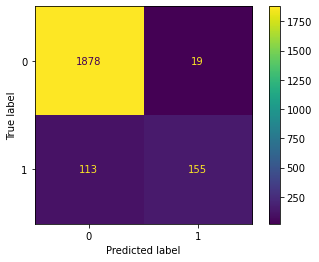

In [393]:
#Confusion Matrix
print("Confusion Matrix:")
plot_confusion_matrix(lrc, X_test, y_test) 

In [394]:
# Predicted values
pred=lrc.predict(X_test)
# AUC
print("AUC:", roc_auc_score(y_test,pred)) 

AUC: 0.7841711972556826


## Create the score

In [395]:
#Describe without scientic notation 
pd.options.display.float_format = '{:,.10f}'.format

#Get Intercept & Coefficients
print(pd.DataFrame(lrc.intercept_))
print(pd.DataFrame(lrc.coef_))
print( X_train.columns)

              0
0 -0.0036264277
             0             1            2            3             4             5             6             7
0 0.0230917405 -0.0006558978 0.0022050167 0.0002624013 -0.0134466677 -0.0011874707 -0.0495635753 -0.0000082425
Index(['recoveries_2', 'total_rec_prncp', 'final_d_time', 'loan_amount', 'dti', 'issue_d_time', 'interest_rate', 'annual_inc'], dtype='object')


##  score: 
0: probability of being zero 

1: probability of being 1 (our score)

In [396]:
df_score = pd.DataFrame(lrc.predict_proba(X_train))
df_score.head()

,0,1
0,0.9576882734,0.0423117266
1,0.9998640668,0.0001359332
2,0.9999885523,0.0000114477
3,0.8684200390,0.1315799610
4,0.6515294197,0.3484705803


## KS 

In [397]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [398]:
# Select the probability 
prob=pd.DataFrame(lrc.predict_proba(X_train),  columns=['prob_0', 'prob_1'])
prob=prob['prob_1']

In [399]:
# Select the target
y=pd.DataFrame(y_train).reset_index()
y=y['loan_condition_cat']

In [400]:
df_prob_target = pd.concat([prob, y], axis=1)
df_prob_target.head(5)

,prob_1,loan_condition_cat
0,0.0423117266,0
1,0.0001359332,0
2,0.0000114477,0
3,0.1315799610,0
4,0.3484705803,1


In [401]:
# Calculate the KS 
mydf = ks(data=df_prob_target,target="loan_condition_cat", prob="prob_1")

           min_prob     max_prob  events  nonevents event_rate nonevent_rate cum_eventrate cum_noneventrate            KS
Decile                                                                                                                   
1      0.4033698946 0.9998709114     820        190     62.40%         2.16%        62.40%            2.16% 60.2000000000
2      0.2078058122 0.4025873083     183        827     13.93%         9.41%        76.33%           11.57% 64.8000000000
3      0.0985887401 0.2077126989     126        884      9.59%        10.06%        85.92%           21.63% 64.3000000000
4      0.0525505882 0.0984995665      64        946      4.87%        10.77%        90.79%           32.40% 58.4000000000
5      0.0292279922 0.0524206441      38        972      2.89%        11.06%        93.68%           43.46% 50.2000000000
6      0.0140605224 0.0292170239      37        973      2.82%        11.07%        96.50%           54.54% 42.0000000000
7      0.0055606475 0.01

In [402]:
mydf.to_excel (r'rating.xlsx', index = False, header=True)

In [403]:
## Grades 
conditions = [
    (df_prob_target['prob_1'] >= 0) &  (df_prob_target['prob_1'] <=  0.0002040323),
    (df_prob_target['prob_1'] > 0.0002040323) &  (df_prob_target['prob_1'] <=  0.0014842158),
    (df_prob_target['prob_1'] > 0.0014842158) &  (df_prob_target['prob_1'] <=  0.0052620662),
    (df_prob_target['prob_1'] > 0.0052620662) &  (df_prob_target['prob_1'] <=  0.0133755599),
    (df_prob_target['prob_1'] > 0.0133755599) &  (df_prob_target['prob_1'] <=  0.0279208389),
    (df_prob_target['prob_1'] > 0.0279208389) &  (df_prob_target['prob_1'] <=  0.0523148757),
    (df_prob_target['prob_1'] > 0.0523148757) &  (df_prob_target['prob_1'] <=  0.1018698218),
    (df_prob_target['prob_1'] > 0.1018698218 ) &  (df_prob_target['prob_1'] <=  0.2133073307),
    (df_prob_target['prob_1'] > 0.2133073307 ) &  (df_prob_target['prob_1'] <=  0.4173952146),
    (df_prob_target['prob_1'] > 0.4173952146) ]
choices = ['AAA','AA','A','BBB','BB','B','CCC', 'CC', 'C', 'D']

df_prob_target['Rating'] = np.select(conditions, choices, default='error')

df_prob_target['Rating'].value_counts()

In [404]:
 df_prob_target.groupby("Rating")["loan_condition_cat"].sum()

Rating
A       10
AA       7
AAA      5
B       42
BB      34
BBB     23
C      193
CC     127
CCC     67
D      806
Name: loan_condition_cat, dtype: int64

##### --

End of the modelling 

# 4) Aplication 

In [413]:
sample = pd.read_csv("sample ajusted.csv", sep= ';' , encoding = 'latin_1')

In [414]:
pd.set_option('display.max_columns', 200)
sample.head()

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc,total_pymnt,loan_condition_cat,term,installment,customer_ref,randon
0,0,"5,000.0000000000",365,5000,27.6500000000,762,10.6500000000,24000,5861,0,36,162.8700000000,1,6
1,1,456.4600000000,1005,2500,1.0000000000,762,15.2700000000,30000,1008,1,60,59.8300000000,2,6
2,0,"2,400.0000000000",579,2400,8.7200000000,762,15.9600000000,12252,3003,0,36,84.3300000000,3,4
3,0,"10,000.0000000000",365,10000,20.0000000000,762,13.4900000000,49200,12226,0,36,339.3100000000,4,8
4,0,"2,233.1000000000",0,3000,17.9400000000,762,12.6900000000,80000,3242,0,60,67.7900000000,5,8


In [415]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107988 entries, 0 to 107987
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   recoveries_2        107988 non-null  int64  
 1   total_rec_prncp     107988 non-null  float64
 2   final_d_time        107988 non-null  int64  
 3   loan_amount         107988 non-null  int64  
 4   dti                 107988 non-null  float64
 5   issue_d_time        107988 non-null  int64  
 6   interest_rate       107988 non-null  float64
 7   annual_inc          107988 non-null  int64  
 8   total_pymnt         107988 non-null  int64  
 9   loan_condition_cat  107988 non-null  int64  
 10  term                107988 non-null  int64  
 11  installment         107988 non-null  float64
 12  customer_ref        107988 non-null  int64  
 13  randon              107988 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 11.5 MB


In [416]:
#seleet the variable to apply the modelling 
X_aply=sample[['recoveries_2' , 'total_rec_prncp', 'final_d_time', 'loan_amount' , 'dti', 'issue_d_time' ,'interest_rate' , 'annual_inc']]

In [417]:
X_aply.isnull().sum()

recoveries_2       0
total_rec_prncp    0
final_d_time       0
loan_amount        0
dti                0
issue_d_time       0
interest_rate      0
annual_inc         0
dtype: int64

In [421]:
sample_score = pd.DataFrame(lrc.predict_proba(X_aply), columns=['prob_0', 'prob_1'])
sample_score.head()

,prob_0,prob_1
0,0.9596355381,0.0403644619
1,0.3385621561,0.6614378439
2,0.8299740267,0.1700259733
3,0.9954210302,0.0045789698
4,0.9575299364,0.0424700636


As we want the problability of been good customer, we select the prob_0

In [423]:
# Select the probabilit
sample_score_1=sample_score['prob_0']

In [425]:
#get together the prob_0
sample_2=pd.concat([sample, sample_score_1], axis=1)

In [431]:
sample_2.head()

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc,total_pymnt,loan_condition_cat,term,installment,customer_ref,randon,prob_0,score
0,0,"5,000.0000000000",365,5000,27.6500000000,762,10.6500000000,24000,5861,0,36,162.8700000000,1,6,0.9596355381,959.6355381270
1,1,456.4600000000,1005,2500,1.0000000000,762,15.2700000000,30000,1008,1,60,59.8300000000,2,6,0.3385621561,338.5621561478
2,0,"2,400.0000000000",579,2400,8.7200000000,762,15.9600000000,12252,3003,0,36,84.3300000000,3,4,0.8299740267,829.9740266615
3,0,"10,000.0000000000",365,10000,20.0000000000,762,13.4900000000,49200,12226,0,36,339.3100000000,4,8,0.9954210302,995.4210301606
4,0,"2,233.1000000000",0,3000,17.9400000000,762,12.6900000000,80000,3242,0,60,67.7900000000,5,8,0.9575299364,957.5299363808


In [429]:
# Create the score
sample_2['score']=sample_2['prob_0']*1000


# 5) Matrix 

In [457]:
matrix_fico = pd.read_csv("matrix_fico.csv", sep= ';' , encoding = 'latin_1')

In [467]:
matrix_fico["percent"]=matrix_fico['Y_2011']*len(sample_2)/100
matrix_fico['percent_cum']=matrix_fico['percent'].cumsum().round()

In [468]:
matrix_fico

,Y_2011,percent,percent_cum
0,6.3000000000,"6,803.2440000000","6,803.0000000000"
1,8.7000000000,"9,394.9560000000","16,198.0000000000"
2,9.9000000000,"10,690.8120000000","26,889.0000000000"
3,9.8000000000,"10,582.8240000000","37,472.0000000000"
4,12.1000000000,"13,066.5480000000","50,538.0000000000"
5,15.5000000000,"16,738.1400000000","67,277.0000000000"
6,19.6000000000,"21,165.6480000000","88,442.0000000000"
7,18.1000000000,"19,545.8280000000","107,988.0000000000"


In [488]:
sample_3 = sample_2.sort_values(['score'])
sample_3['order']=range(1, len(sample_3) + 1)

In [489]:
sample_3.head()

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc,total_pymnt,loan_condition_cat,term,installment,customer_ref,randon,prob_0,score,order
5682,0,411.2300000000,1522,35000,10.9200000000,823,13.4900000000,80000,804,1,60,805.1700000000,5683,6,0.0000546455,0.0546455495,1
6289,0,867.1800000000,1492,35000,9.8400000000,823,11.7100000000,80000,1545,1,60,773.4400000000,6290,9,0.0000710450,0.0710449609,2
15818,0,706.9000000000,1645,35000,16.5000000000,976,19.2900000000,65000,1825,1,60,913.5200000000,15819,10,0.0000770230,0.0770229929,3
767,0,412.2900000000,1430,35000,14.7900000000,762,20.8900000000,71316,1151,1,60,576.2700000000,768,1,0.0000881629,0.0881629078,4
6674,0,"1,751.2600000000",1430,35000,0.3500000000,823,11.7100000000,51000,3090,1,60,773.4400000000,6675,10,0.0001008081,0.1008080621,5


In [490]:
## Grades 
conditions = [
    (sample_3['order'] <= matrix_fico['percent_cum'][0]),
    (sample_3['order'] > matrix_fico['percent_cum'][0] ) &  (sample_3['order'] <=  matrix_fico['percent_cum'][1]),
    (sample_3['order'] > matrix_fico['percent_cum'][1]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][2]),
    (sample_3['order'] > matrix_fico['percent_cum'][2]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][3]),
    (sample_3['order'] > matrix_fico['percent_cum'][3]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][4]),
    (sample_3['order'] > matrix_fico['percent_cum'][4]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][5]),
    (sample_3['order'] > matrix_fico['percent_cum'][5]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][6]),
    (sample_3['order'] > matrix_fico['percent_cum'][6]) &  (sample_3['order'] <=  matrix_fico['percent_cum'][7]) ]
choices = ['E','D','C','CC','B','BB','A', 'AA']

sample_3['Rating'] = np.select(conditions, choices, default='error')

In [491]:
sample_3

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc,total_pymnt,loan_condition_cat,term,installment,customer_ref,randon,prob_0,score,order,Rating
5682,0,411.2300000000,1522,35000,10.9200000000,823,13.4900000000,80000,804,1,60,805.1700000000,5683,6,0.0000546455,0.0546455495,1,E
6289,0,867.1800000000,1492,35000,9.8400000000,823,11.7100000000,80000,1545,1,60,773.4400000000,6290,9,0.0000710450,0.0710449609,2,E
15818,0,706.9000000000,1645,35000,16.5000000000,976,19.2900000000,65000,1825,1,60,913.5200000000,15819,10,0.0000770230,0.0770229929,3,E
767,0,412.2900000000,1430,35000,14.7900000000,762,20.8900000000,71316,1151,1,60,576.2700000000,768,1,0.0000881629,0.0881629078,4,E
6674,0,"1,751.2600000000",1430,35000,0.3500000000,823,11.7100000000,51000,3090,1,60,773.4400000000,6675,10,0.0001008081,0.1008080621,5,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66421,0,"35,000.0000000000",122,35000,6.7700000000,61,25.8000000000,850000,47862,0,36,"1,406.4500000000",66422,3,0.9999999997,999.9999997083,107984,AA
40529,0,"24,999.9900000000",1005,25000,3.2600000000,1371,19.7900000000,1440000,33332,0,36,926.3700000000,40530,7,0.9999999998,999.9999997592,107985,AA
67877,0,"23,298.7900000000",0,35000,3.9200000000,61,8.9000000000,2000000,27779,0,36,"1,111.3700000000",67878,6,0.9999999999,999.9999999119,107986,AA
29708,0,"15,500.0000000000",214,25000,0.2000000000,1310,10.6200000000,3900000,20037,0,60,334.0800000000,29709,8,1.0000000000,"1,000.0000000000",107987,AA


### Create the PD

In [492]:
PD=sample_3.groupby("Rating")["loan_condition_cat"].agg(['sum','count'])
PD

,sum,count
Rating,,
A,392,21165
AA,171,19546
B,704,13066
BB,564,16739
C,1376,10691
CC,1014,10583
D,3641,9395
E,6577,6803


In [493]:
PD['bad_rate']=PD['sum']/len(sample_3)
PD

,sum,count,bad_rate
Rating,,,
A,392,21165,0.0036300330
AA,171,19546,0.0015835093
B,704,13066,0.0065192429
BB,564,16739,0.0052228025
C,1376,10691,0.0127421565
CC,1014,10583,0.0093899322
D,3641,9395,0.0337167093
E,6577,6803,0.0609049154


In [494]:
# get together the PD for simulation

sample_3['PD_A']=PD['bad_rate'][0]
sample_3['PD_AA']=PD['bad_rate'][1]
sample_3['PD_B']=PD['bad_rate'][2]
sample_3['PD_BB']=PD['bad_rate'][3]
sample_3['PD_C']=PD['bad_rate'][4]
sample_3['PD_CC']=PD['bad_rate'][5]
sample_3['PD_D']=PD['bad_rate'][6]
sample_3['PD_E']=PD['bad_rate'][7]

In [495]:
sample_3

,recoveries_2,total_rec_prncp,final_d_time,loan_amount,dti,issue_d_time,interest_rate,annual_inc,total_pymnt,loan_condition_cat,term,installment,customer_ref,randon,prob_0,score,order,Rating,PD_A,PD_AA,PD_B,PD_BB,PD_C,PD_CC,PD_D,PD_E
5682,0,411.2300000000,1522,35000,10.9200000000,823,13.4900000000,80000,804,1,60,805.1700000000,5683,6,0.0000546455,0.0546455495,1,E,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
6289,0,867.1800000000,1492,35000,9.8400000000,823,11.7100000000,80000,1545,1,60,773.4400000000,6290,9,0.0000710450,0.0710449609,2,E,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
15818,0,706.9000000000,1645,35000,16.5000000000,976,19.2900000000,65000,1825,1,60,913.5200000000,15819,10,0.0000770230,0.0770229929,3,E,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
767,0,412.2900000000,1430,35000,14.7900000000,762,20.8900000000,71316,1151,1,60,576.2700000000,768,1,0.0000881629,0.0881629078,4,E,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
6674,0,"1,751.2600000000",1430,35000,0.3500000000,823,11.7100000000,51000,3090,1,60,773.4400000000,6675,10,0.0001008081,0.1008080621,5,E,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66421,0,"35,000.0000000000",122,35000,6.7700000000,61,25.8000000000,850000,47862,0,36,"1,406.4500000000",66422,3,0.9999999997,999.9999997083,107984,AA,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
40529,0,"24,999.9900000000",1005,25000,3.2600000000,1371,19.7900000000,1440000,33332,0,36,926.3700000000,40530,7,0.9999999998,999.9999997592,107985,AA,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
67877,0,"23,298.7900000000",0,35000,3.9200000000,61,8.9000000000,2000000,27779,0,36,"1,111.3700000000",67878,6,0.9999999999,999.9999999119,107986,AA,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154
29708,0,"15,500.0000000000",214,25000,0.2000000000,1310,10.6200000000,3900000,20037,0,60,334.0800000000,29709,8,1.0000000000,"1,000.0000000000",107987,AA,0.0036300330,0.0015835093,0.0065192429,0.0052228025,0.0127421565,0.0093899322,0.0337167093,0.0609049154


In [ ]:
https://www.science.smith.edu/~jcrouser/SDS293/labs/ 